In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
from scipy import fftpack

In [36]:

#sns.set( style="darkgrid", context="talk")
#plt.style.use("dark_background")
#plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5}) # To enhance the grid's aesthetics

In [37]:
dfp = pd.read_csv('data/city_hour.csv')
dfp.Datetime = pd.to_datetime(dfp.Datetime,format = '%d-%m-%Y %H:%M')
dfp.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [38]:
dft = pd.read_csv('data/temp_hour.csv')
#del dft['Unnamed: 0']
dft.Datetime = pd.to_datetime(dft.Datetime, format = '%d-%m-%Y %H:%M')
dft.head(5)

,City,Datetime,maxtempC,mintempC,sunHour,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2009-01-01 00:00:00,27,12,11.6,16,18,18,18,11,2,91,0.0,1014,14,10,109,8
1,Bengaluru,2009-01-01 01:00:00,27,12,11.6,16,17,17,17,9,2,93,0.0,1014,14,7,85,6
2,Bengaluru,2009-01-01 02:00:00,27,12,11.6,15,16,16,16,7,2,94,0.0,1014,13,5,61,4
3,Bengaluru,2009-01-01 03:00:00,27,12,11.6,15,15,15,15,5,2,96,0.0,1014,12,2,37,3
4,Bengaluru,2009-01-01 04:00:00,27,12,11.6,15,18,18,18,5,1,88,0.0,1015,14,5,45,3


In [39]:
df = dfp.merge(dft,on=['City','Datetime'])
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,...,20,14,65,91,0.0,1010,19,7,141,9
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,...,19,12,74,94,0.0,1010,19,5,149,8
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,...,19,10,83,97,0.0,1010,18,2,156,6
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,...,19,9,75,93,0.0,1011,19,5,156,7
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,...,20,9,66,90,0.0,1011,20,7,155,7


In [40]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'maxtempC', 'mintempC', 'sunHour', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph'],
      dtype='object')

In [41]:
city = ['Bengaluru', 'Delhi', 'Hyderabad', 'Jaipur', 'Mumbai']

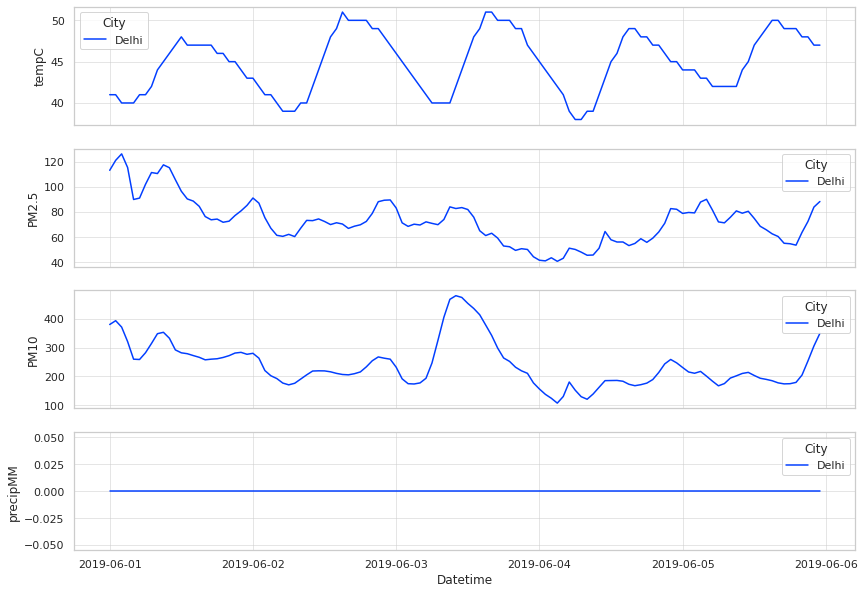

In [42]:
dc = df[(df.City == 'Delhi')]
dff = dc[(dc['Datetime'].dt.year == 2019) 
         & (dc['Datetime'].dt.month == 6) 
         & (dc['Datetime'].dt.day <=5)
        ]
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (14,10),sharex=True,)
sns.lineplot(dff['Datetime'],dff['tempC'],hue = dff['City'],ax=ax1)
sns.lineplot(dff['Datetime'],dff['PM2.5'],hue = dff['City'],ax=ax2)
sns.lineplot(dff['Datetime'],dff['PM10'],hue = dff['City'],ax=ax3)
sns.lineplot(dff['Datetime'],dff['precipMM'],hue = dff['City'],ax=ax4)
#sns.lineplot(dff['Datetime'],dff['windspeedKmph'],hue = dff['City'],ax=ax5)
fig.savefig(f'images/fftlineplot.png', bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='Datetime', ylabel='precipMM'>

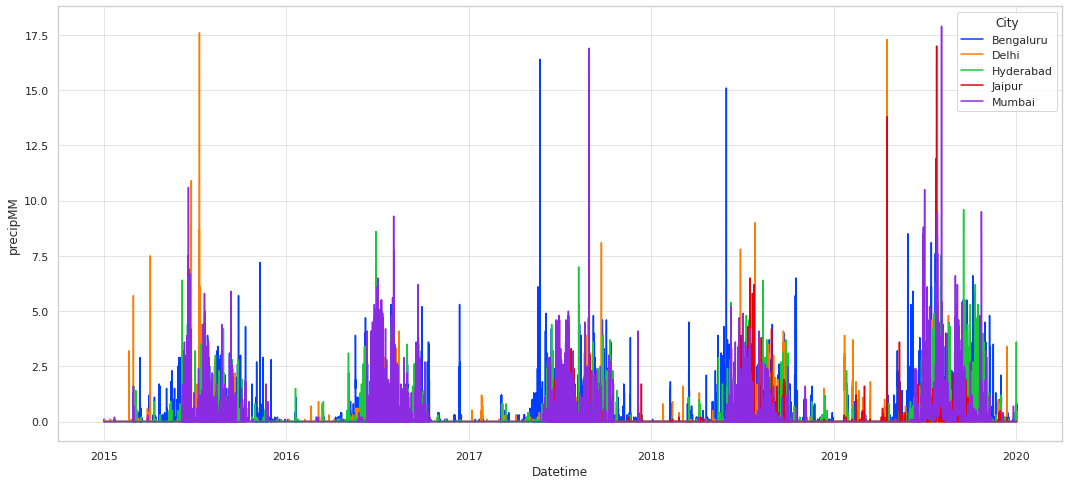

In [54]:
fig = plt.subplots(1,1,figsize=(18,8))
sns.lineplot(df.Datetime,df.precipMM,hue = df.City)

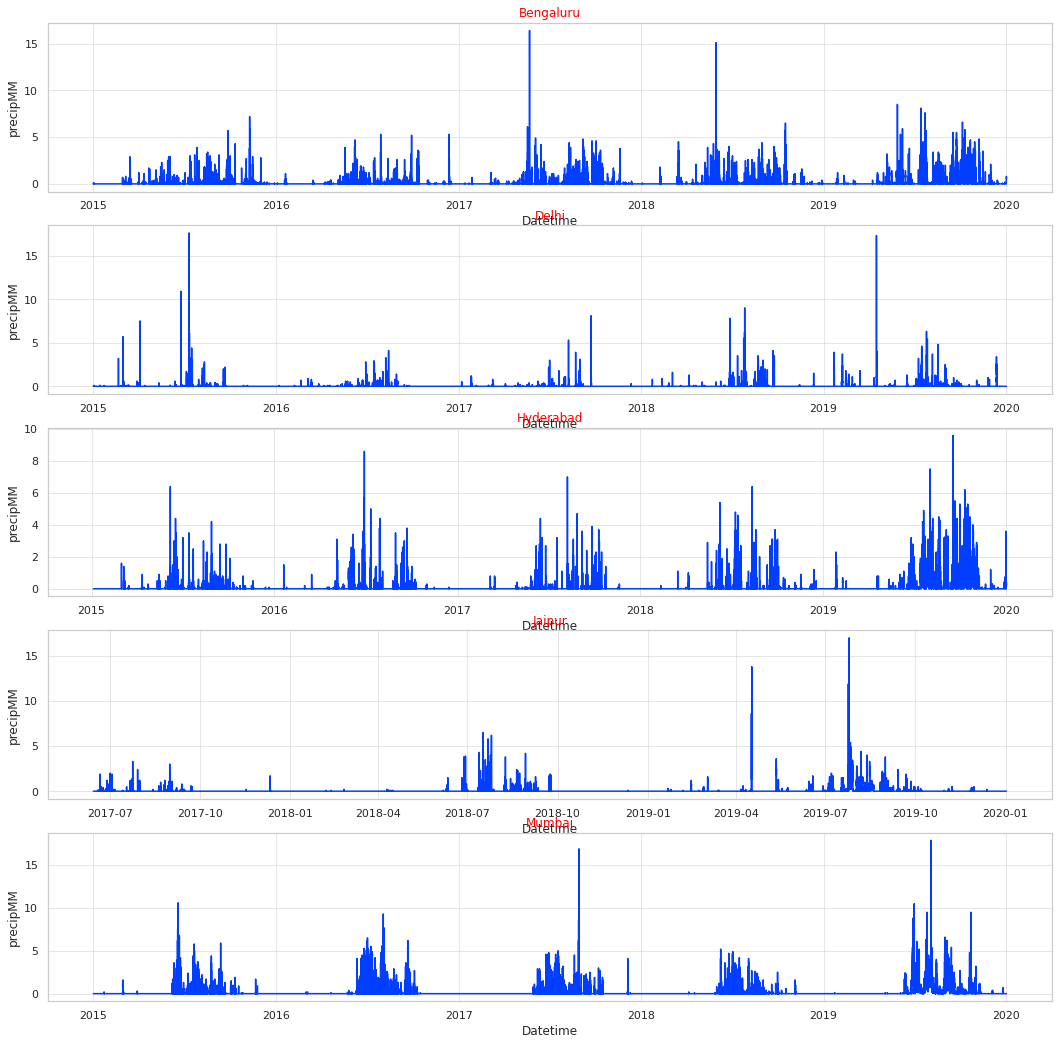

In [56]:
fig,ax = plt.subplots(5,1,figsize = (18,18))
for l,i in enumerate(city):
    sr = 1
    dfc = df[df['City'].isin([i])]
    sns.lineplot(dfc.Datetime,dfc.precipMM,ax=ax[l])
    ax[l].set_title("{0}".format(i),c='red')


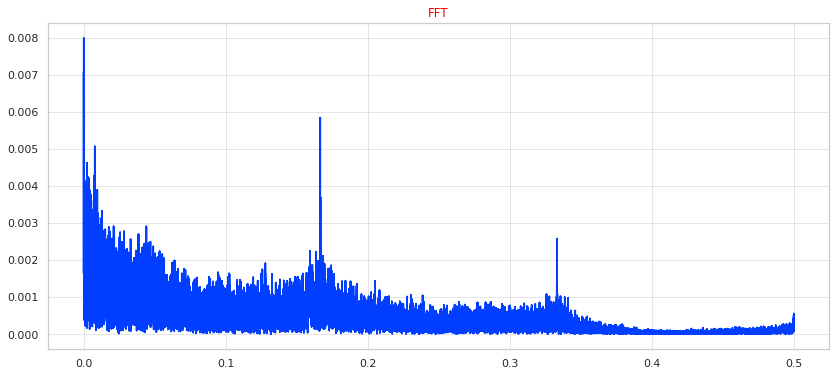

In [44]:
fig,ax = plt.subplots(1,1,figsize = (14,6))
N = df.shape[0]
sr = 1
dfc = df[df['City'].isin(['Delhi'])]
dfc.head(2)
y = np.array(dfc['precipMM'])
y = y[~np.isnan(y)]
yf = fftpack.fft(y)
f = fftpack.fftfreq(len(y))
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli=freq_ampli.iloc[1:]
ax.plot(freq_ampli['Freq'],freq_ampli['Ampli'])
ax.set_title("FFT",c='red')
fig.savefig(f'images/fftdelhitemp.png', bbox_inches='tight')

In [45]:
def freq(df):
    N = df.shape[0]
    y = df
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    print(yf)
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2+1]), 2.0 / N * np.abs(yf[:N//2+1])),columns=['Freq','Ampli'])
    freq_ampli = freq_ampli[1:]
    return freq_ampli 
freq_ampli1 = freq(y)
y.shape

[1610.          -0.j          550.69436177+431.38457586j
   38.23827799+333.84027384j ... -109.62863414-120.687927j
   38.23827799-333.84027384j  550.69436177-431.38457586j]


(43847,)

In [57]:
fdai = freq_ampli1.sort_values(by=['Ampli'],ascending=False)
fdai.head(10)

,Freq,Ampli
5,0.000114,0.036024
10,0.000228,0.034269
1,0.000023,0.031908
7308,0.166670,0.026356
345,0.007868,0.022879
344,0.007845,0.022081
15,0.000342,0.021569
105,0.002395,0.020878
11,0.000251,0.020616
16,0.000365,0.020227


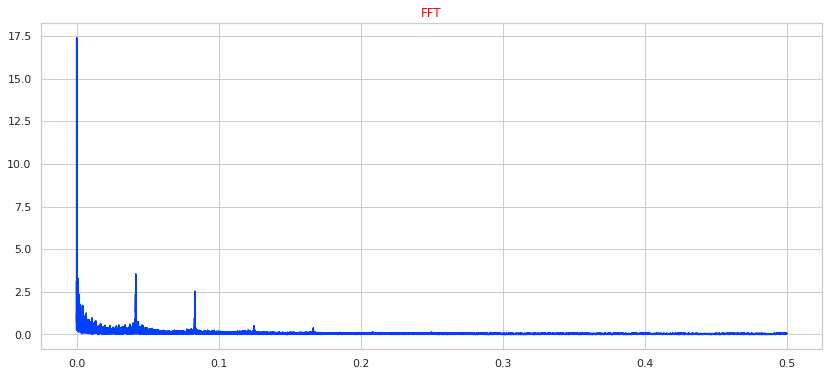

In [15]:
fig,ax = plt.subplots(1,1,figsize = (14,6))
N = df.shape[0]
sr = 1
dfc = df[df['City'].isin(['Delhi'])]
dfc.head(2)
y = np.array(dfc['PM2.5'])
y = y[~np.isnan(y)]
yf = fftpack.fft(y)
f = fftpack.fftfreq(len(y))
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli=freq_ampli.iloc[1:]
ax.plot(freq_ampli['Freq'],freq_ampli['Ampli'])
ax.set_title("FFT",c='red') 
fig.savefig(f'images/fftdelhipm25.png', bbox_inches='tight')

In [47]:
def freq(df):
    N = df.shape[0]
    y = df
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    print(yf)
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2+1]), 2.0 / N * np.abs(yf[:N//2+1])),columns=['Freq','Ampli'])
    freq_ampli = freq_ampli[1:]
    return freq_ampli 
freq_ampli1 = freq(y)
y.shape

[1610.          -0.j          550.69436177+431.38457586j
   38.23827799+333.84027384j ... -109.62863414-120.687927j
   38.23827799-333.84027384j  550.69436177-431.38457586j]


(43847,)

In [48]:
fdai = freq_ampli1.sort_values(by=['Ampli'],ascending=False)
fdai

,Freq,Ampli
5,0.000114,3.602362e-02
10,0.000228,3.426888e-02
1,0.000023,3.190825e-02
7308,0.166670,2.635580e-02
345,0.007868,2.287879e-02
...,...,...
20070,0.457728,8.978132e-06
18689,0.426232,8.352102e-06
17459,0.398180,7.537467e-06
18070,0.412115,6.149164e-06


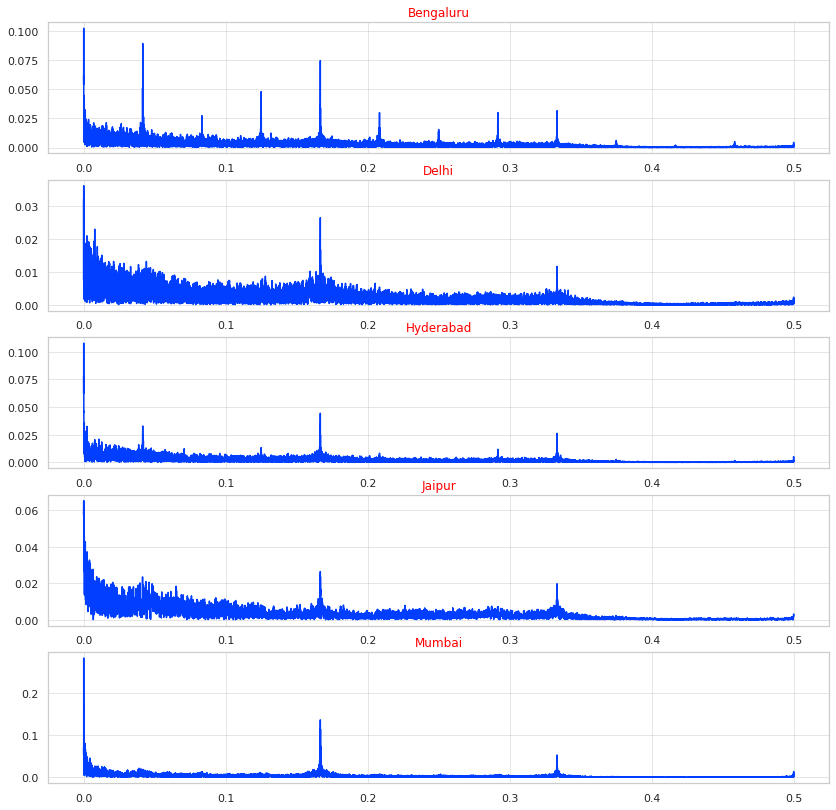

In [49]:
fig,ax = plt.subplots(5,1,figsize = (14,14))
for l,i in enumerate(city):
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['precipMM'])
    y = y[~np.isnan(y)]
    N = dfc.shape[0]
    T = 1.0 / N
    #x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    #xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l].set_title("{0}".format(i),c='red') 

In [19]:
freq_ampli = freq_ampli.sort_values(by='Ampli')
freq_ampli

,Freq,Ampli
1486,0.107378,0.001124
12353,0.107378,0.001124
7586,0.451839,0.001897
6253,0.451839,0.001897
12186,0.119445,0.002108
...,...,...
13836,0.000217,3.964976
1,0.000072,4.226701
13838,0.000072,4.226701
2,0.000145,7.018626


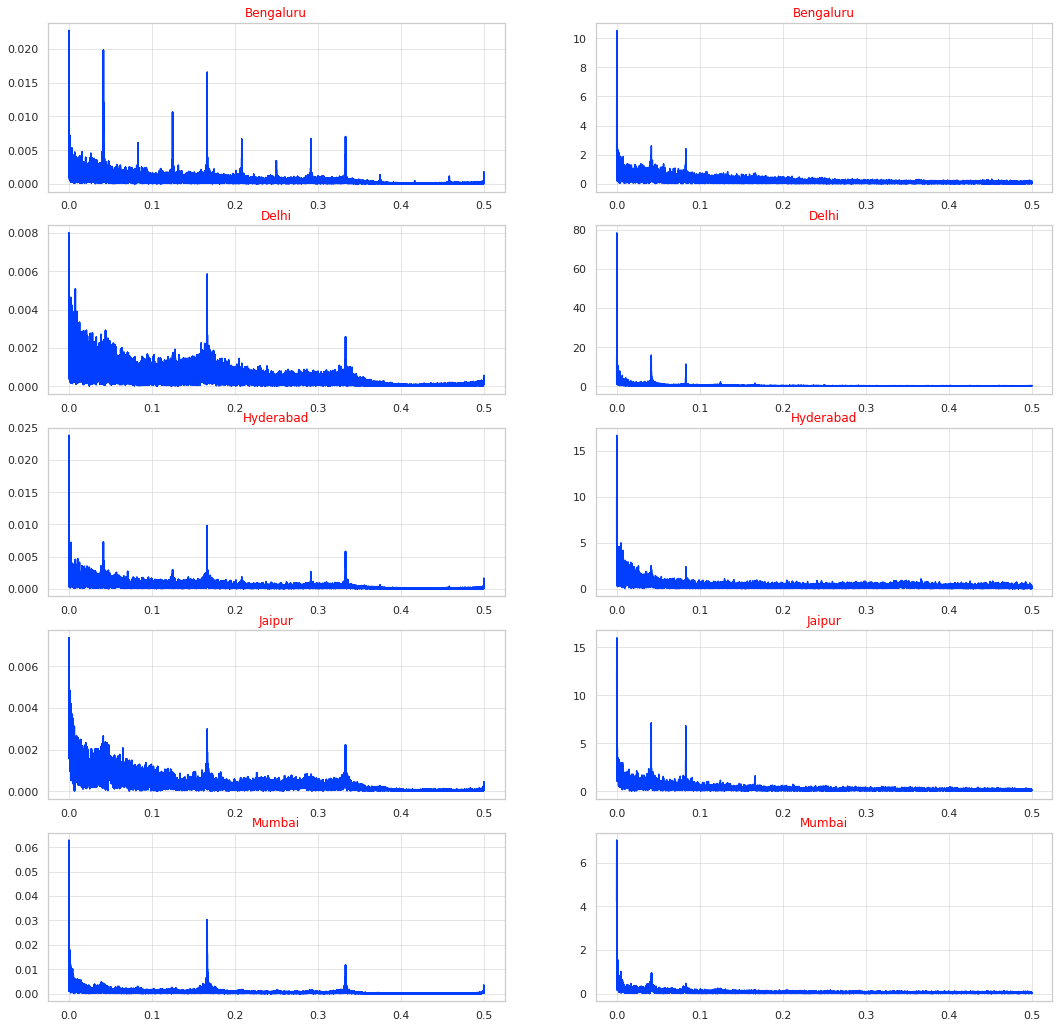

In [50]:
fig,ax = plt.subplots(5,2,figsize = (18,18))
for l,i in enumerate(city):
    N = df.shape[0]
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['precipMM'])
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l][0].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l][0].set_title("{0}".format(i),c='red')
for l,i in enumerate(city):
    sr = 1
    dfc = df[df['City'].isin([i])]
    y = np.array(dfc['PM2.5'])
    y = y[~np.isnan(y)]
    N = dfc.shape[0]
    T = 1.0 / N
    x = np.linspace(0.0, N*T, N)
    yf = fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    f = fftpack.fftfreq(len(y))
    freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
    freq_ampli=freq_ampli.iloc[1:]
    ax[l][1].plot(freq_ampli['Freq'],freq_ampli['Ampli'])
    ax[l][1].set_title("{0}".format(i),c='red')
fig.savefig(f'images/fftall.png', bbox_inches='tight')

In [85]:
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,...,20,14,65,91,0.0,1010,19,7,141,9
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,...,19,12,74,94,0.0,1010,19,5,149,8
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,...,19,10,83,97,0.0,1010,18,2,156,6
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,...,19,9,75,93,0.0,1011,19,5,156,7
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,...,20,9,66,90,0.0,1011,20,7,155,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197658,Mumbai,2020-01-01 19:00:00,87.29,157.49,7.75,46.47,54.21,16.66,0.96,7.58,...,25,16,4,64,0.0,1014,25,10,324,14
197659,Mumbai,2020-01-01 20:00:00,86.16,155.17,11.43,50.71,62.14,17.22,1.07,7.20,...,25,15,4,65,0.0,1015,25,10,330,13
197660,Mumbai,2020-01-01 21:00:00,96.47,173.27,15.65,60.21,75.86,17.36,1.22,7.03,...,25,14,4,67,0.0,1015,25,10,335,13
197661,Mumbai,2020-01-01 22:00:00,107.37,192.57,22.38,70.16,92.56,16.99,1.35,6.96,...,25,13,4,66,0.0,1015,25,10,301,12
